# Credit Card Fraud Detection

The aim of this project to recognize fradulent credit card transcations so that customers of credit card companies are not charged for items that they did not purchase.

In [1]:
# importing the dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the database into Pandas Dataframe
credit_card_data = pd.read_csv('creditcard.csv')

In [3]:
#first 5 rows of dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# dataset infomations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# checking the missing valued in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# The distribution of legit transcations and fraudulent transcations
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Only 0.17% fraudulent transaction out all the transactions. From above we can see that data is highly unbalanced this is because most of the transactions (99.8%) are not fraudulent which makes it really hard for detecting the fraudulent ones.

0 --> Legit transcation  1--> fradulent trancation

In [8]:
# separating tha data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [9]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [10]:
# statistical measure for data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Plotting the Correlation Martix

The correlation matrix graphically gives us an idea of how features correlate with each other and can help 
us predict what are the features that are most relevant for the prediction.

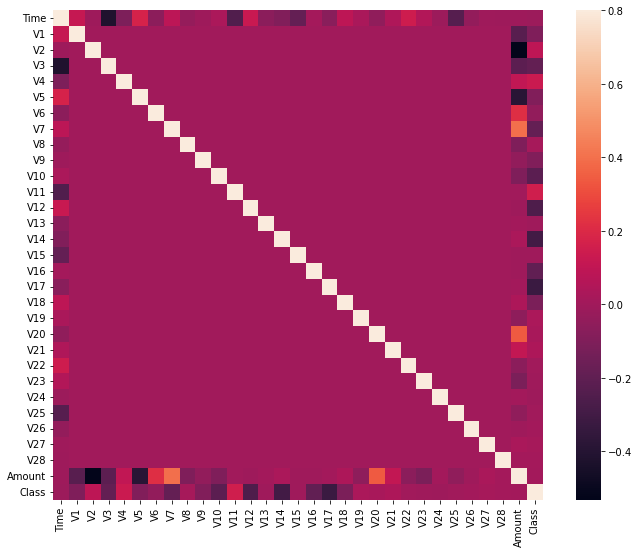

In [12]:
# Correlation matrix
corrmat = credit_card_data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example, V2 and V5 are highly negatively correlated with the feature called Amount. We also see some correlation with V20 and Amount. This gives us a deeper understanding of the Data available to us.

In [13]:
#compare the value for both the transcations
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


The dataset is highly unbalanced to we have to do under-sampling to make better model

Under-Sampling

Build the sample dataset for containing similar distribution of normal transcations and fradulent transcations

Number of fradulent transaction--> 492

In [14]:
legit_sample = legit.sample(n=492)

Concatenating two dataframes

In [15]:
new_data = pd.concat([legit_sample,fraud], axis=0)

In [16]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
28453,35017.0,1.407637,-0.216455,-0.050724,-0.647766,-0.512868,-1.106753,-0.050468,-0.344337,-1.319771,...,0.242678,0.743398,-0.094838,0.468036,0.712944,-0.077110,-0.003341,0.001616,1.00,0
136051,81520.0,-0.833437,0.696661,2.070786,1.651265,-0.678048,0.970403,-0.488938,0.937010,0.138485,...,-0.189236,-0.256720,0.057932,0.219529,-0.433221,-0.465254,0.109726,0.069721,10.34,0
54947,46701.0,1.318156,-0.896776,0.323733,-0.964839,-0.661253,0.573003,-1.027074,0.124980,-0.376778,...,0.357056,0.917705,-0.301859,-1.257767,0.534371,0.059201,0.043974,0.019355,69.99,0
170680,120307.0,2.061090,-0.254413,-1.270999,-0.047370,0.169170,-0.373235,-0.106959,-0.085818,0.694556,...,-0.507262,-1.607254,0.483420,-0.040876,-0.639516,0.030731,-0.083627,-0.045770,29.98,0
46688,42889.0,1.023253,-0.333358,0.287852,0.667553,-0.304112,0.277219,-0.171585,0.203300,0.352770,...,-0.139315,-0.433705,-0.065577,-0.284793,0.336494,0.296414,-0.030306,0.007176,82.00,0


In [17]:
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [18]:
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

Now the data is balanced we can do the further analysis

Splitting the data into Features and Targets

In [19]:
X = new_data.drop(columns='Class', axis=1)
Y = new_data['Class']

In [20]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
28453    35017.0  1.407637 -0.216455 -0.050724 -0.647766 -0.512868 -1.106753   
136051   81520.0 -0.833437  0.696661  2.070786  1.651265 -0.678048  0.970403   
54947    46701.0  1.318156 -0.896776  0.323733 -0.964839 -0.661253  0.573003   
170680  120307.0  2.061090 -0.254413 -1.270999 -0.047370  0.169170 -0.373235   
46688    42889.0  1.023253 -0.333358  0.287852  0.667553 -0.304112  0.277219   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [21]:
print(Y)

28453     0
136051    0
54947     0
170680    0
46688     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into training data and testing data

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Model training

## Logistic Regression

In [24]:
model = LogisticRegression()

In [25]:
#Training the logistic Regression with Training Data
model.fit(X_train, Y_train)


LogisticRegression()

Model Evaluation

Accuracy Score

In [26]:
# accuracy of the training data
X_train_predication= model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predication, Y_train)

In [27]:
print('Accuracy on training data : ',training_data_accuracy )

Accuracy on training data :  0.9479034307496823


In [28]:
# accuracy of the testing data
X_test_predication = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_predication, Y_test)

In [29]:
print('Accuracy on testing data : ', testing_data_accuracy)

Accuracy on testing data :  0.9289340101522843


## K-Nearest Neighbors

In [30]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [67]:
model = KNeighborsClassifier(n_neighbors = 10)

In [68]:
#Training the K-Nearest Neighbors with Training Data
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [69]:
# n = 7
# KNN = KNeighborsClassifier(n_neighbors = n)
# KNN.fit(X_train, Y_train)
# knn_yhat = KNN.predict(X_test)

#### Accuracy of our K-Nearest Neighbors model

In [70]:
# accuracy of the training data
X_train_predication= model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predication, Y_train)

In [71]:
print('Accuracy on training data : ',training_data_accuracy )

Accuracy on training data :  0.7344345616264295


In [72]:
# accuracy of the testing data
X_test_predication = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_predication, Y_test)

In [73]:
print('Accuracy on testing data : ', testing_data_accuracy)

Accuracy on testing data :  0.7106598984771574


In [35]:
# print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(Y_test, knn_yhat)))

## Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [48]:
model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')

In [49]:
#Training the Decision Tree with Training Data
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [50]:
# accuracy of the training data
X_train_predication= model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predication, Y_train)

In [51]:
print('Accuracy on training data : ',training_data_accuracy )

Accuracy on training data :  0.9453621346886912


In [52]:
# accuracy of the testing data
X_test_predication = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_predication, Y_test)

In [53]:
print('Accuracy on testing data : ', testing_data_accuracy)

Accuracy on testing data :  0.9035532994923858


In [ ]:
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_train, Y_train)
dt_yhat = DT.predict(X_test)

#### Accuracy of Decision Tree model

In [ ]:
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(Y_test, dt_yhat)))

In [ ]:
print('F1 score of the Decision Tree model is {}'.format(f1_score(Y_test, dt_yhat)))

#### Checking the confusion matrix:

In [ ]:
confusion_matrix(Y_test, dt_yhat, labels = [0, 1])

Here, the first row represents positive and the second row represents negative. So, we have 98 as true positive and 1 as false positive. That says, out of 98+1=99, we have 98 that are successfully classified as a normal transaction and 1 was falsely classified as normal — but it was fraudulent.

## SVM Model

In [74]:
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR

In [76]:
model = SVC()

In [77]:
#Training the Decision Tree with Training Data
model.fit(X_train, Y_train)

SVC()

In [78]:
# accuracy of the training data
X_train_predication= model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predication, Y_train)

In [79]:
print('Accuracy on training data : ',training_data_accuracy )

Accuracy on training data :  0.5451080050825922


In [80]:
# accuracy of the testing data
X_test_predication = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_predication, Y_test)

In [81]:
print('Accuracy on testing data : ', testing_data_accuracy)

Accuracy on testing data :  0.5329949238578681


## Random Forest

In [82]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor

In [83]:
model = RandomForestClassifier(max_depth = 4)

In [84]:
#Training the Decision Tree with Training Data
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4)

In [85]:
# accuracy of the training data
X_train_predication= model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predication, Y_train)

In [86]:
print('Accuracy on training data : ',training_data_accuracy )

Accuracy on training data :  0.9491740787801779


In [87]:
# accuracy of the testing data
X_test_predication = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_predication, Y_test)

In [88]:
print('Accuracy on testing data : ', testing_data_accuracy)

Accuracy on testing data :  0.9137055837563451


In [90]:
from sklearn.metrics import matthews_corrcoef

In [91]:
matthews_corrcoef(Y_train, X_train_predication)

0.9030376282670298